<a href="https://colab.research.google.com/github/Nada902/taxi-fare-regression-tf/blob/main/mlcc_linear_regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In this project I used a real dataset to train a model to predict the fare of a taxi ride in Chicago, Illinois.

**Objectives**

*   Read a .csv file into a pandas DataFrame.

*   Explore a dataset with Python visualization libraries.

*   Experiment with different features to build a linear regression model.

*   Tune the model's hyperparameters.

*   Compare training runs using root mean squared error and loss curves.



**Dataset Description**

The dataset for this exercise is derived from the City of Chicago Taxi Trips dataset. The data for this exercise is a subset of the Taxi Trips data, and focuses on a two-day period in May of 2022.
https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv

#SetUp

##Load Dependencies

In [1]:
#data
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
#ML
import tensorflow as tf
import tensorflow.keras as keras

##Dataset

In [2]:
path = 'https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv'

df = pd.read_csv(path)
df.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


In [3]:
training_df = df[['TRIP_SECONDS','TRIP_MILES','FARE', 'TIP_RATE', 'PAYMENT_TYPE', 'COMPANY']]

print('number of training set rows is : ', len(training_df.index))
training_df.head(10)


number of training set rows is :  31694


,TRIP_SECONDS,TRIP_MILES,FARE,TIP_RATE,PAYMENT_TYPE,COMPANY
0,2341,2.57,31.99,6.3,Mobile,Flash Cab
1,1074,1.18,9.75,27.9,Credit Card,Flash Cab
2,1173,1.29,10.25,0.0,Cash,Sun Taxi
3,3360,3.70,23.75,0.0,Cash,Choice Taxi Association
4,1044,1.15,10.00,0.0,Cash,Flash Cab
5,1251,1.38,11.00,27.3,Credit Card,Flash Cab
6,1813,2.00,14.50,0.0,Cash,Sun Taxi
7,1857,2.05,14.75,25.8,Credit Card,Sun Taxi
8,787,0.87,8.00,0.0,Cash,City Service
9,1399,1.55,17.88,23.0,Mobile,Flash Cab


# Part 2 - Dataset Exploration


## Dataset Stats

In [4]:
# this code cell answers these questions
'''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

training_df.describe(include='all')

,TRIP_SECONDS,TRIP_MILES,FARE,TIP_RATE,PAYMENT_TYPE,COMPANY
count,31694.000000,31694.000000,31694.000000,31694.000000,31694,31694
unique,NaN,NaN,NaN,NaN,7,31
top,NaN,NaN,NaN,NaN,Credit Card,Flash Cab
freq,NaN,NaN,NaN,NaN,14142,7887
mean,1319.796397,8.289463,23.905210,12.965785,NaN,NaN
std,928.932873,7.265672,16.970022,15.517765,NaN,NaN
min,60.000000,0.500000,3.250000,0.000000,NaN,NaN
25%,548.000000,1.720000,9.000000,0.000000,NaN,NaN
50%,1081.000000,5.920000,18.750000,12.200000,NaN,NaN
75%,1888.000000,14.500000,38.750000,20.800000,NaN,NaN


##Correlation matrix

In [5]:
#this code cell answers these questions
'''Which feature correlates most strongly to the label FARE?
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

Which feature correlates least strongly to the label FARE?

The feature with the weakest correlation to the FARE is TIP_RATE.

'''

training_df.corr(numeric_only=True)

,TRIP_SECONDS,TRIP_MILES,FARE,TIP_RATE
TRIP_SECONDS,1.000000,0.800855,0.830292,-0.084294
TRIP_MILES,0.800855,1.000000,0.975344,-0.049594
FARE,0.830292,0.975344,1.000000,-0.070979
TIP_RATE,-0.084294,-0.049594,-0.070979,1.000000


##Data Visualization

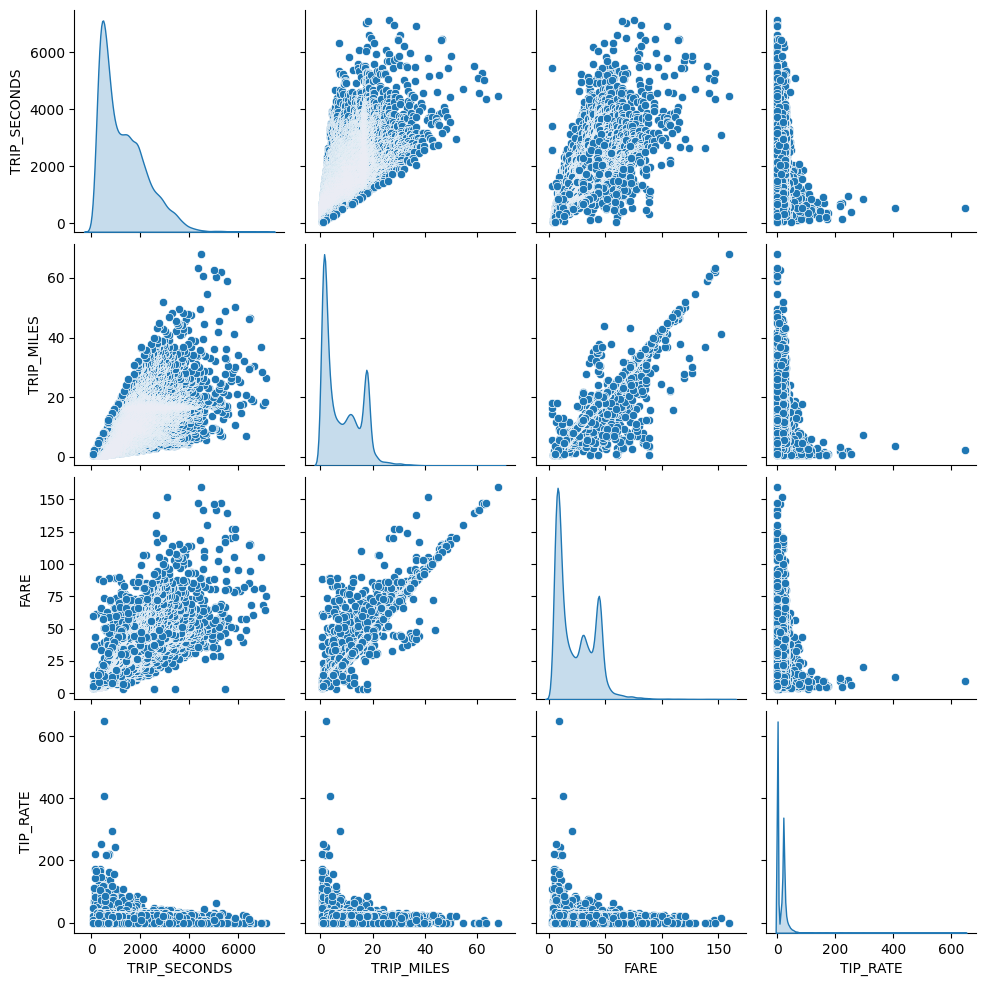

In [6]:
sns.pairplot(training_df, diag_kind='kde')

# Part 3 - Train Model


##plotting functions

In [7]:

# Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation



print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


##ML function

In [8]:
def my_model(learning_rate, num_features):
  """
    Builds and compiles a simple linear regression model.

    Parameters:
        learning_rate (float): The learning rate for the optimizer.
        num_features (int): Number of features in the dataset.

    Returns:
        keras.Model: A compiled TensorFlow model.
    """
  features_as_input = keras.Input(shape=(num_features,))
  label_as_output = keras.layers.Dense(units=1)(features_as_input)
  #Modeling
  my_model = keras.Model(inputs=features_as_input, outputs = label_as_output)
  # Compile the model with optimizer, loss function, and evaluation metric

  my_model.compile( optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                   loss="mean_squared_error",
                    metrics=[keras.metrics.RootMeanSquaredError()])
  return my_model


def train(model, df, features, label, epochs, batch_size):
  """
    Trains the model and extracts important parameters.

    Parameters:
        model (keras.Model): The compiled model.
        df (pd.DataFrame): The dataset.
        features (numpy.ndarray): Feature values (x).
        label (numpy.ndarray): Label values (y).
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.

    Returns:
        tuple: (weights, bias, epoch_list, RMSE history)
    """
  #train the model
  train_history= model.fit(x=features, y=label, batch_size = batch_size, epochs=epochs)
  #extract weights & bias
  weight = model.get_weights()[0]
  bias= model.get_weights()[1]
  #retrieve epochs
  epochs=train_history.epoch
  #dataframe the training history
  df_history = pd.DataFrame(train_history.history)
  #Extract RMSE values to track performance
  rmse = df_history['root_mean_squared_error']

  return weight, bias, epochs, rmse



def controller(df, feature_names, label_name, learning_rate, epochs, batch_size):
    """
      Manages the entire workflow: data extraction, model training, and visualization.

      Parameters:
          df (pd.DataFrame): The dataset.
          feature_names (list): List of feature column names.
          label_name (str): Target column name.
          learning_rate (float): Learning rate for training.
          epochs (int): Number of training epochs.
          batch_size (int): Batch size for training.

      Returns:
          keras.Model: The trained model.
      """
    print("Features are being used in this experiment are {} and Label is {}".format(feature_names, label_name))

    features = df[feature_names].values
    label = df[label_name].values

    # Build and train the model
    model = my_model(learning_rate, len(feature_names))
    model_prediction = train(model, df, features, label, epochs, batch_size)

    # Display model details
    print(model_info(feature_names, label_name, model_prediction))

    # Display plots
    make_plots(df, feature_names, label_name, model_prediction)

    return model





print("SUCCESS: defining linear regression functions complete.")





SUCCESS: defining linear regression functions complete.


##Train model with one feature

 train a model to predict the cost of the fare using a single feature.
 As we saw that TRIP_MILES correlates most strongly with the FARE, so let's start with TRIP_MILES as the feature for first training run.

In [9]:
#this code cell answer these questions
"""
How many epochs did it take to converge on the final model?
How well does the model fit the sample data?
"""


# variables as hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

features = ['TRIP_MILES']
label = 'FARE'

model_1 = controller(training_df, features, label, learning_rate, epochs, batch_size)

Features are being used in this experiment are ['TRIP_MILES'] and Label is FARE
Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 520.7324 - root_mean_squared_error: 22.7959
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241.5377 - root_mean_squared_error: 15.5165
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79.0571 - root_mean_squared_error: 8.8541
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.1834 - root_mean_squared_error: 4.4842
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.4476 - root_mean_squared_error: 4.0526
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2305 - root_mean_squared_error: 3.8969
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.4796 - root_mean_squared_error: 3.7990
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8322 - root_mean_squared_error: 3.8480
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4953 - root_mean_squared_error: 3.665

## Experiment with hyperparameters


* *Experiment 1:* **Increase** the learning rate to **``1``** (batch size at ``50``).
* *Experiment 2:* **Decrease** the learning rate to **``0.0001``** (batch size at ``50``).
* *Experiment 3:* **Increase** the batch size to **``500``** (learning rate at ``0.001``).



In [11]:

# How did raising the learning rate impact your ability to train the model?
# -----------------------------------------------------------------------------
answer = """
When the learning rate is too high, the loss curve bounces around and does not
appear to be moving towards convergence with each iteration. Also, notice that
the predicted model does not fit the data very well. With a learning rate that
is too high, it is unlikely that you will be able to train a model with good
results.
"""
print(answer)

# How did lowering the learning rate impact your ability to train the model?
# -----------------------------------------------------------------------------
answer = '''
When the learning rate is too small, it may take longer for the loss curve to
converge. With a small learning rate the loss curve decreases slowly, but does
not show a dramatic drop or leveling off. With a small learning rate you could
increase the number of epochs so that your model will eventually converge, but
it will take longer.
'''
print(answer)

# Did changing the batch size effect your training results?
# -----------------------------------------------------------------------------
answer = '''
Increasing the batch size makes each epoch run faster, but as with the smaller
learning rate, the model does not converge with just 20 epochs. If you have
time, try increasing the number of epochs and eventually you should see the
model converge.
'''
print(answer)


When the learning rate is too high, the loss curve bounces around and does not
appear to be moving towards convergence with each iteration. Also, notice that
the predicted model does not fit the data very well. With a learning rate that
is too high, it is unlikely that you will be able to train a model with good
results.


When the learning rate is too small, it may take longer for the loss curve to
converge. With a small learning rate the loss curve decreases slowly, but does
not show a dramatic drop or leveling off. With a small learning rate you could
increase the number of epochs so that your model will eventually converge, but
it will take longer.


Increasing the batch size makes each epoch run faster, but as with the smaller
learning rate, the model does not converge with just 20 epochs. If you have
time, try increasing the number of epochs and eventually you should see the
model converge.



##Train model with 2 features

The model trained with the feature TOTAL_MILES demonstrates fairly strong predictive power, but is it possible to do better? In this step, training the model with two features, TRIP_MILES and TRIP_MINUTES, to see if it can improve the model.


Notice that the scatter plot of the features vs. the label is a three dimensional (3-D) plot. This representation allows you to visualize both features and the label all together. The two features (TRIP_MILES and TRIP_MINUTES) are on the x and y axis, and the label (FARE) is on the z axis. The plot shows individual examples in the dataset as circles, and the model as a surface (plane). With this 3-D model, if the trained model is good you would expect most of the examples to land on the plane surface. The 3-D plot is interactive so you can explore the data further by clicking or dragging the plot.






In [13]:
#this code cell answer these questions
'''

# Does the model with two features produce better results than one using a single feature?
answer :
To answer this question for your specific training runs, compare the RMSE for
each model. For example, if the RMSE for the model trained with one feature was
3.7457 and the RMSE for the model with two features is 3.4787, that means that
on average the model with two features makes predictions that are about $0.27
closer to the observed fare.
# -----------------------------------------------------------------------------


# Does it make a difference if you use TRIP_SECONDS instead of TRIP_MILES?
answer:
When training a model with more than one feature, it is important that all
numeric values are roughly on the same scale. In this case, TRIP_SECONDS and
TRIP_MILES do not meet this criteria. The mean value for TRIP_MILES is 8.3 and
the mean for TRIP_SECONDS is 1320; that is two orders of magnitude difference.
Converting the trip duration to minutes helps during training because in puts
values for both features on a more comparable scale. Of course, this is not the
only way to scale values before training, but you will learn about that in
another module.

# -----------------------------------------------------------------------------


# How well do you think the model comes to the ground truth fare calculation for
# Chicago taxi trips?
answer :
In reality, Chicago taxi cabs use a documented formula to determine cab fares.
For a single passenger paying cash, the fare is calculated like this:

FARE = 2.25 * TRIP_MILES + 0.12 * TRIP_MINUTES + 3.25

Typically with machine learning problems you would not know the 'correct'
formula, but in this case you can this knowledge to evaluate your model. Take a
look at your model output (the weights and bias) and determine how well it
matches the ground truth fare calculation. You should find that the model is
roughly close to this formula.


'''

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

training_df.loc[:, 'TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60

features = ['TRIP_MILES', 'TRIP_MINUTES']
label = 'FARE'

model_2 = controller(training_df, features, label, learning_rate, epochs, batch_size)

Features are being used in this experiment are ['TRIP_MILES', 'TRIP_MINUTES'] and Label is FARE
Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2506.9961 - root_mean_squared_error: 49.9724
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 741.1467 - root_mean_squared_error: 27.0439
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 46.1204 - root_mean_squared_error: 6.6945
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.1556 - root_mean_squared_error: 3.8889
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.0683 - root_mean_squared_error: 3.8521
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5776 - root_mean_squared_error: 3.5358
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.4170 - root_mean_squared_error: 3.5199
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.2145 - root_mean_squared_error: 3.4858
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.0325 - root_mean_squ

# Part 4 - Validate Model
## Use the model to make predictions

For this exercise, I'll  work with a subset of the same training dataset.



In [14]:
def format_currency(x):
  return "${:.2f}".format(x)


def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(format_currency(predicted))
    data["OBSERVED_FARE"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [16]:
#this code cell answer these questions
"""
How close is the predicted value to the label value? In other words, does your model accurately predict the fare for a taxi ride?
answer:
Based on a random sampling of examples, the model seems to do pretty well
predicting the fare for a taxi ride. Most of the predicted values do not vary
significantly from the observed value.
"""


output = predict_fare(model_2, training_df, features, label)
show_predictions(output)


--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0           $6.53         $6.00   $0.53        0.93         5.73
1          $20.16        $20.25   $0.09        7.00        15.00
2          $20.88        $20.25   $0.63        6.82        22.47
3          $26.98        $27.25   $0.27        8.69        38.47
4          $10.16        $10.11   $0.05        2.46         9.38
5          $46.10        $44.50   $1.60       17.70        44.58
6          $41.91        $41.25   $0.66       16.10        38.00
7          $45.55        $44.00   $1.55       17.90        38.00
8          $44.73        $44.75   $0.02       18.13        29.10
9          $48.04        $45.25   $2.79       17.34        62.95
10          $8.09         $8.00   $0.09   